Introduction aux données
==

<img src="image.png">

In [2]:
import pandas as pd
import numpy as np

In [5]:
votes=pd.read_csv('114_congress.csv',sep=',')
votes.head(3)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


<img src="img1.png">

In [6]:
print(votes['party'].value_counts())
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


<img src="img3.png">

In [9]:
from sklearn.cluster import KMeans

kmeans_model=KMeans(n_clusters=2, random_state=1)
senator_distances=kmeans_model.fit_transform(votes.iloc[:,3:])
print(senator_distances)

[[3.12141628 1.3134775 ]
 [2.6146248  2.05339992]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [1.43833966 2.96866004]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [0.31287498 3.30758755]
 [0.33960656 3.41651746]
 [3.27058526 0.96734144]
 [0.33960656 3.41651746]
 [3.34875646 0.53945585]
 [0.33960656 3.41651746]
 [1.18084816 3.12695614]
 [1.23852221 3.13536063]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [2.6146248  2.05339992]
 [0.58487332 3.31421108]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.56324683 0.93036231]
 [3.42004795 0.24198446]
 [1.73847904 2.82326711]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [0.58487332 3.31421108]
 [3.27058526 0.92088553]
 [0.33960656 3.41651746]
 [3.19687093 0.64668818]
 [3.42004795 0.24198446]


<img src="img4.png">

In [10]:
#  Validation croisée
labels=kmeans_model.labels_
print(pd.crosstab(labels,votes['party']))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


<img src="img5.png">

In [12]:
democratic_outliers=votes[(labels==1) & (votes['party']=='D')]
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


<img src="img6.png">

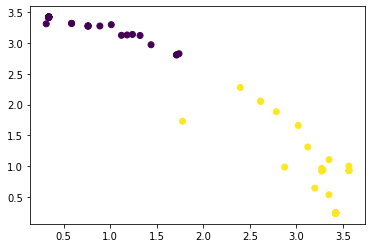

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x=senator_distances[:,0],y=senator_distances[:,1],c=labels)
plt.show()

<img src="img7.png">

In [15]:
extremium=(senator_distances**3).sum(axis=1)
votes['extremium']=extremium
votes.sort_values('extremium', inplace=True, ascending=False)
votes.head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremium
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
47,Isakson,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
65,Murkowski,R,AK,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
30,Enzi,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
